# Projeto 2: Prevendo a Ocorrência de Diabetes com Base em Medidas de Diagnóstico de Pacientes do Sexo Feminino com Menos de 21 Anos de Idade

Para esta análise, será utilizado um conjunto de dados coletados do kaggle:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Introdução

O conjunto de dados é do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabetes and Digestive and Kidney Diseases). O objetivo é prever com base em medidas de diagnóstico, se um paciente tem diabetes. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são do sexo feminino com pelo menos 21 anos de idade.


### Descrição dos Campos

Pregnancies - Número de vezes grávida

Glucose - Concentração plasmática de glicose em teste oral de tolerância à glicose

BloddPressure - Pressão arterial diastólica em mm Hg

SkinThickness - Espessura da dobra da pele do tríceps em mm

Insulin - Insulina em mu U / ml

BMI - Índice de massa corporal medido em peso em kg / (altura em m) ^ 2

DiabetesPedigreeFunction - Índice de histórico de diabetes (Pedigree Function)

Age - Idade em anos

Outcome - Classe (0 - não desenvolveu a doença / 1 - desenvolveu a doença)

### Importando as Bibliotecas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="white")
%matplotlib inline
warnings.filterwarnings('ignore')

### Carregando os Dados

A seguir, vamos carregar os dados e observar como estes estão organizados.

In [3]:
data = pd.read_csv('C:\diabetes.csv', sep=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Análise Exploratória

Vamos relizar uma análise exploratória gráfica dos dados, para que possamos entender como estes estão relacionados.

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

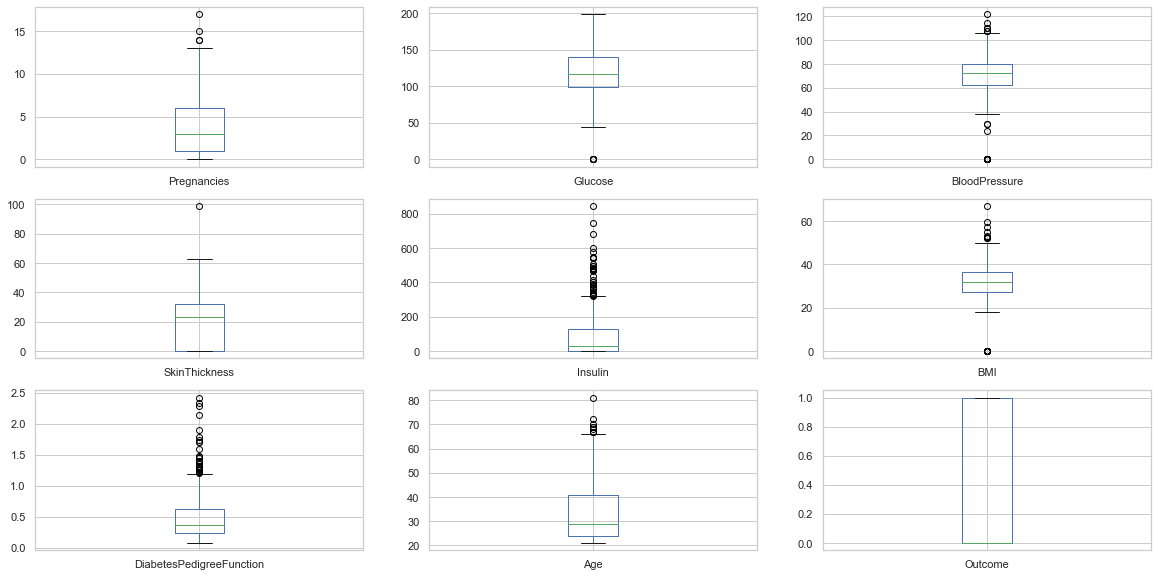

In [6]:
data.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(20,10))

Pode-se observar a presença de vários outliers em algumas das variáveis.

Text(0, 0.5, 'Frequência')

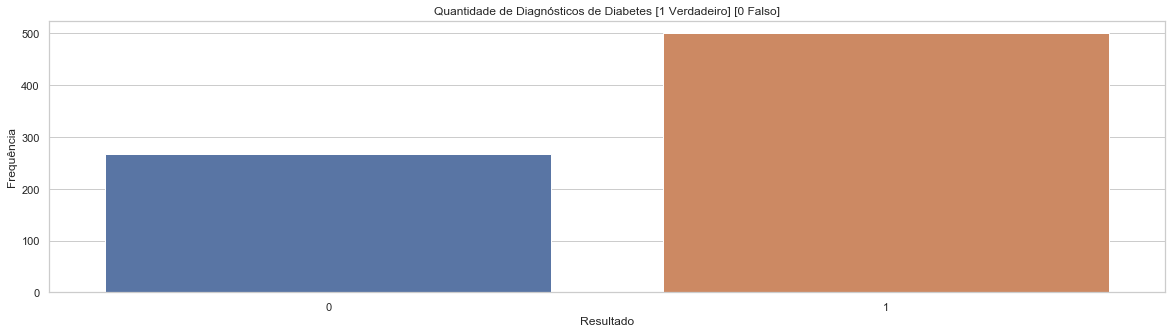

In [7]:
plt.subplots(figsize=(20,5))
sns.barplot(x='Outcome',y=data['Outcome'].value_counts(),data=data)
plt.title('Quantidade de Diagnósticos de Diabetes [1 Verdadeiro] [0 Falso]')
plt.xlabel('Resultado')
plt.ylabel('Frequência')

Podemos observar que a quantidade de casos de diagnósticos positivos é praticamente o dobro da quantidade de casos de diagnósticos nulos. Para que no futuro possamos aplicar um algoritmo de machine learning, teremos de balancear o dataset afim de se evitar que o modelo aprenda mais sobre uma categoria do que outra.

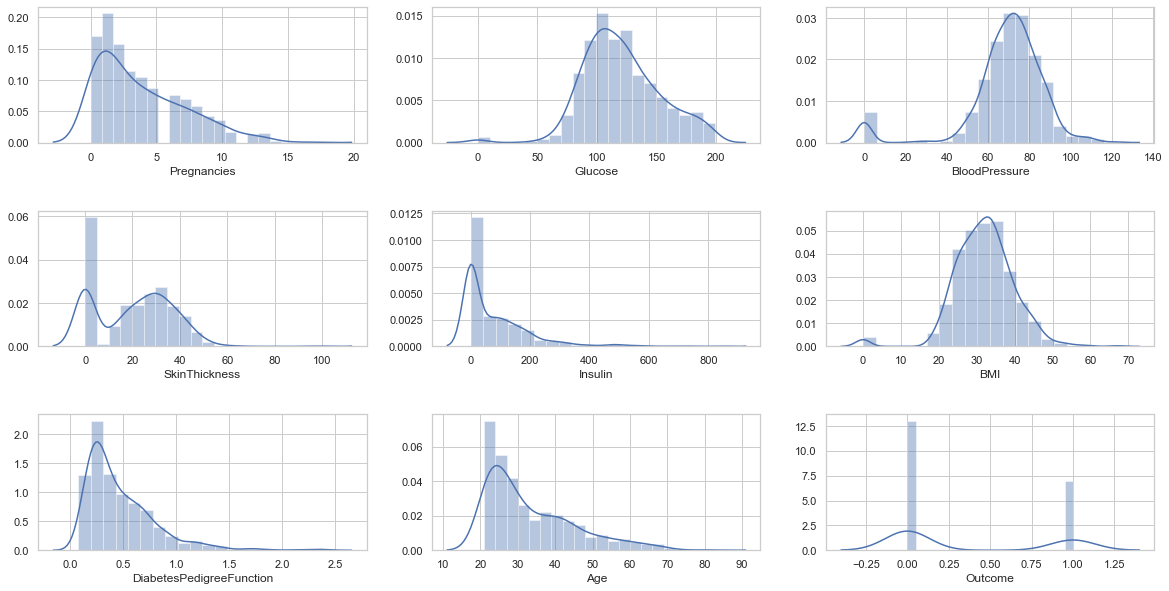

In [8]:
colnames = data.columns
fig, axis = plt.subplots(3, 3, figsize=(20, 10))
sns.distplot(data[colnames[0]], bins=20, ax=axis[0][0])
sns.distplot(data[colnames[1]], bins = 20, ax=axis[0][1])
sns.distplot(data[colnames[2]], bins = 20, ax=axis[0][2])
sns.distplot(data[colnames[3]], bins = 20, ax=axis[1][0])
sns.distplot(data[colnames[4]], bins = 20, ax=axis[1][1])
sns.distplot(data[colnames[5]], bins = 20, ax=axis[1][2])
sns.distplot(data[colnames[6]], bins = 20, ax=axis[2][0])
sns.distplot(data[colnames[7]], bins = 20, ax=axis[2][1])
sns.distplot(data[colnames[8]], bins = 20, ax=axis[2][2])
plt.subplots_adjust(wspace=0.2,hspace=0.5)

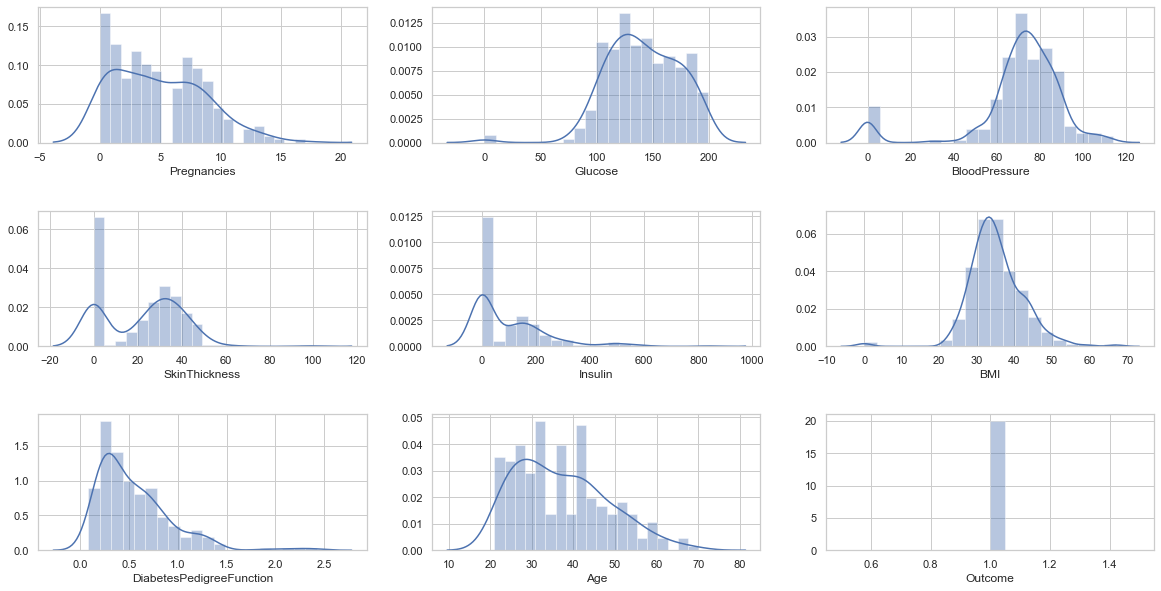

In [9]:
colnames = data.columns
data1=data[data['Outcome']==1]
fig, axis = plt.subplots(3, 3, figsize=(20, 10))
sns.distplot(data1[colnames[0]], bins=20, ax=axis[0][0])
sns.distplot(data1[colnames[1]], bins = 20, ax=axis[0][1])
sns.distplot(data1[colnames[2]], bins = 20, ax=axis[0][2])
sns.distplot(data1[colnames[3]], bins = 20, ax=axis[1][0])
sns.distplot(data1[colnames[4]], bins = 20, ax=axis[1][1])
sns.distplot(data1[colnames[5]], bins = 20, ax=axis[1][2])
sns.distplot(data1[colnames[6]], bins = 20, ax=axis[2][0])
sns.distplot(data1[colnames[7]], bins = 20, ax=axis[2][1])
sns.distplot(data1[colnames[8]], bins = 20, ax=axis[2][2])
plt.subplots_adjust(wspace=0.2,hspace=0.5)

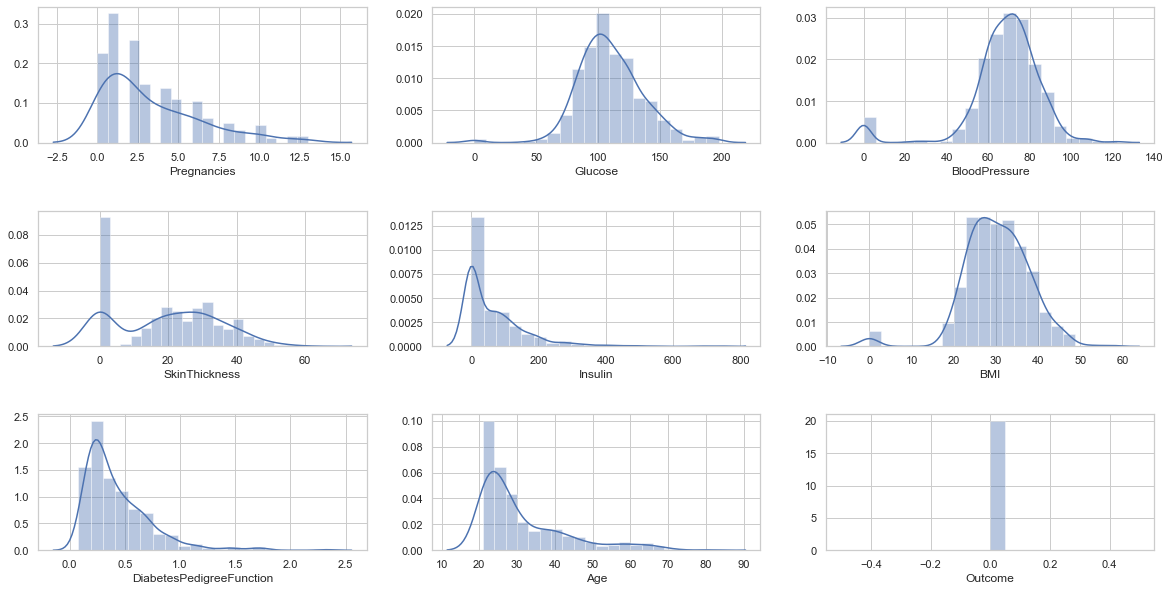

In [10]:
colnames = data.columns
data0=data[data['Outcome']==0]
fig, axis = plt.subplots(3, 3, figsize=(20, 10))
sns.distplot(data0[colnames[0]], bins=20, ax=axis[0][0])
sns.distplot(data0[colnames[1]], bins = 20, ax=axis[0][1])
sns.distplot(data0[colnames[2]], bins = 20, ax=axis[0][2])
sns.distplot(data0[colnames[3]], bins = 20, ax=axis[1][0])
sns.distplot(data0[colnames[4]], bins = 20, ax=axis[1][1])
sns.distplot(data0[colnames[5]], bins = 20, ax=axis[1][2])
sns.distplot(data0[colnames[6]], bins = 20, ax=axis[2][0])
sns.distplot(data0[colnames[7]], bins = 20, ax=axis[2][1])
sns.distplot(data0[colnames[8]], bins = 20, ax=axis[2][2])
plt.subplots_adjust(wspace=0.2,hspace=0.5)

Acima podemos ver os histogramas para cada variável do dataset, nos casos de Outcome = 0 e 1, Outcome = 1 e Outcome = 0.

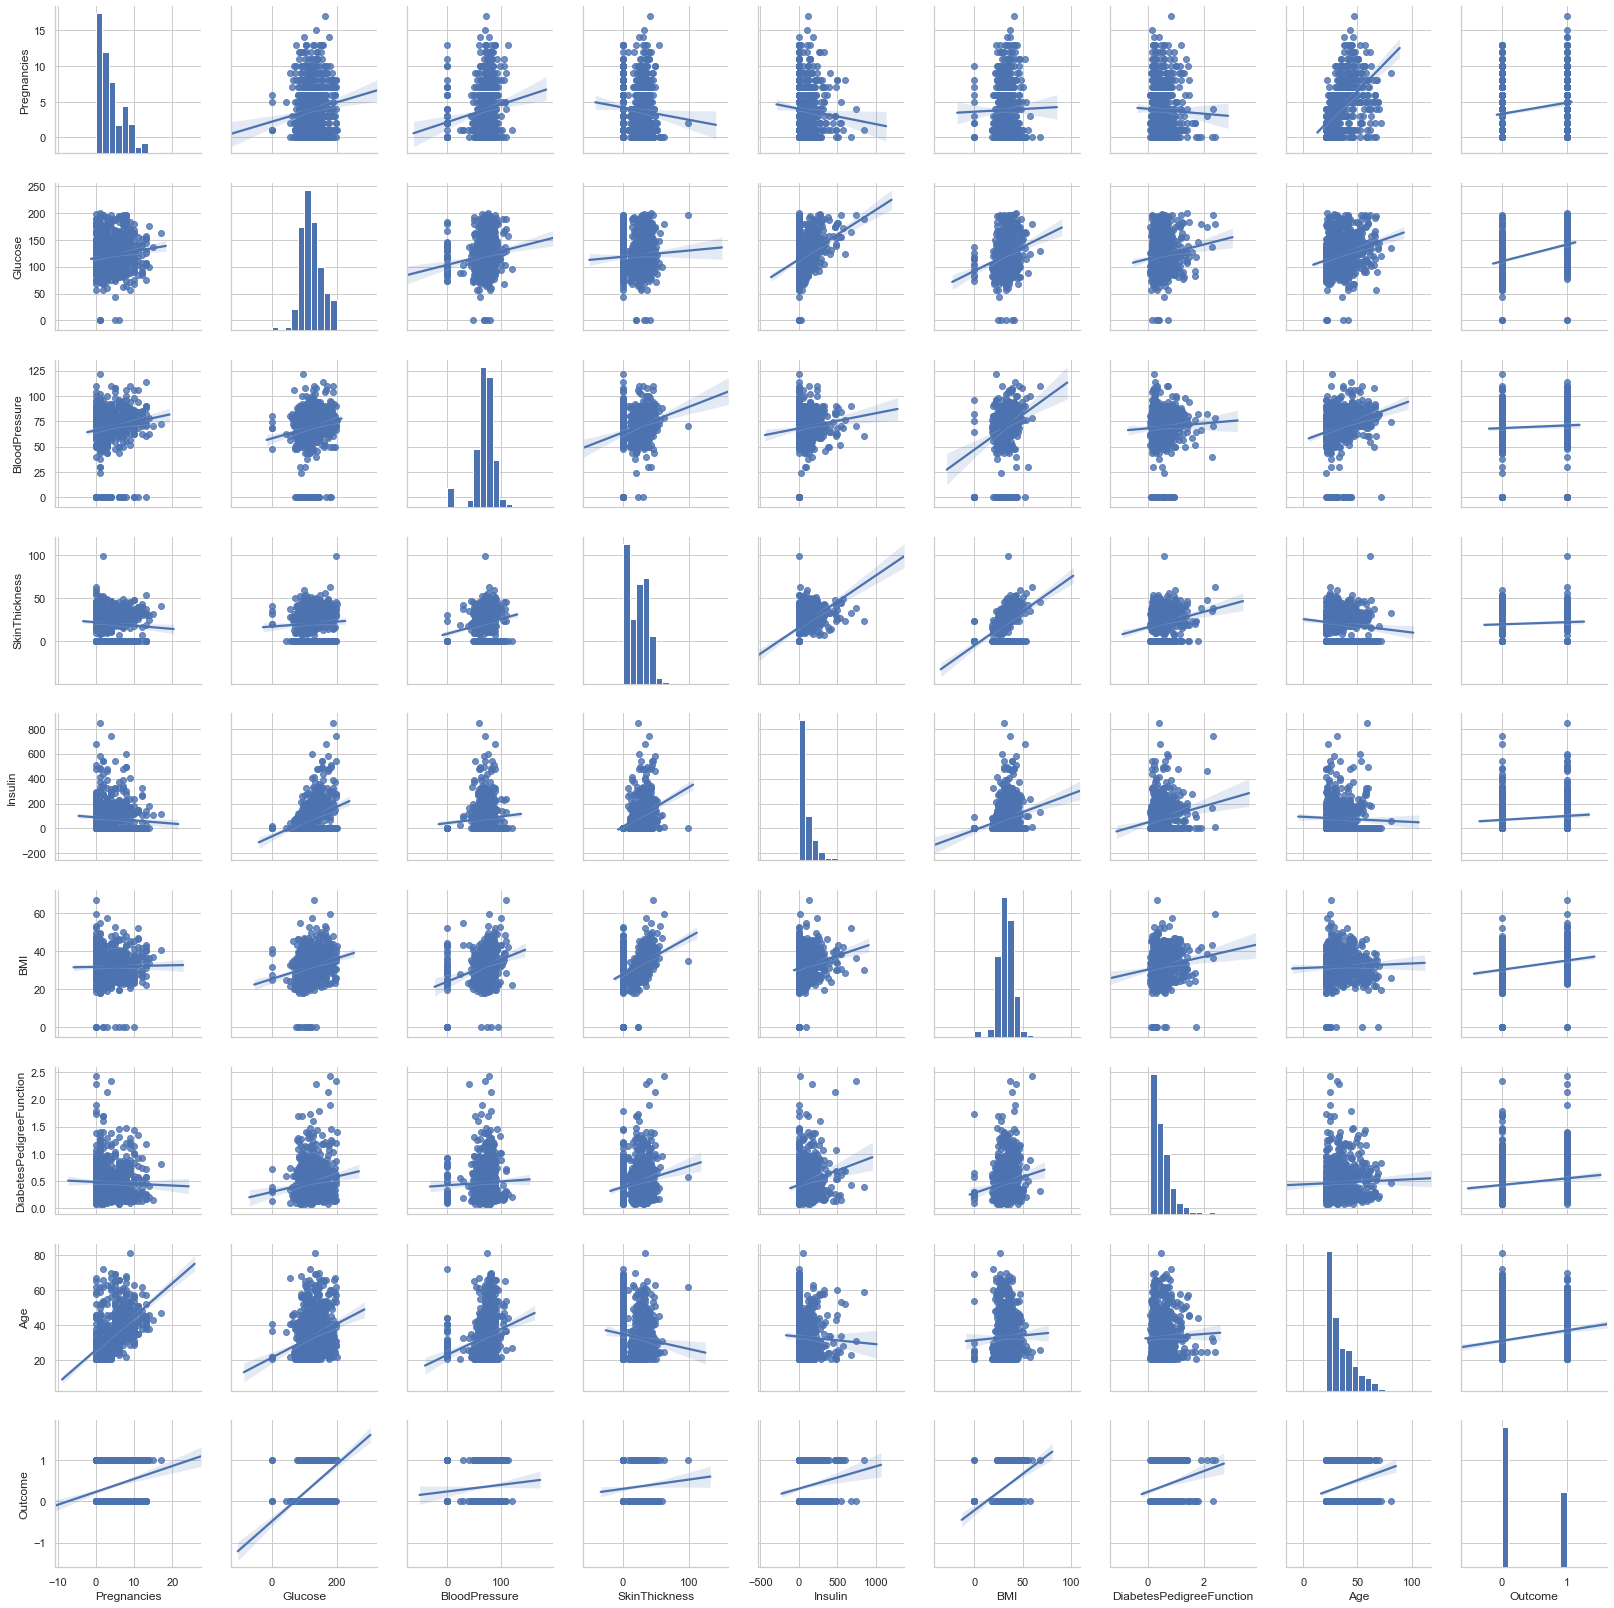

In [11]:
sns.pairplot(data,kind='reg')

In [12]:
correlacao = data.corr()
correlacao

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


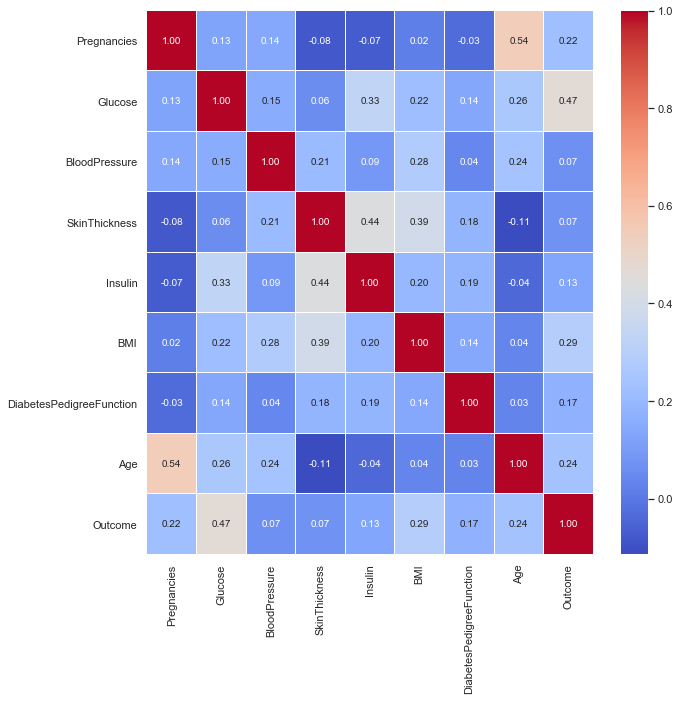

In [13]:
fig, axis = plt.subplots(1, 1, figsize= (10, 10))
sns.heatmap(correlacao, cmap="coolwarm", annot=True, fmt='.2f', linewidths=.05)

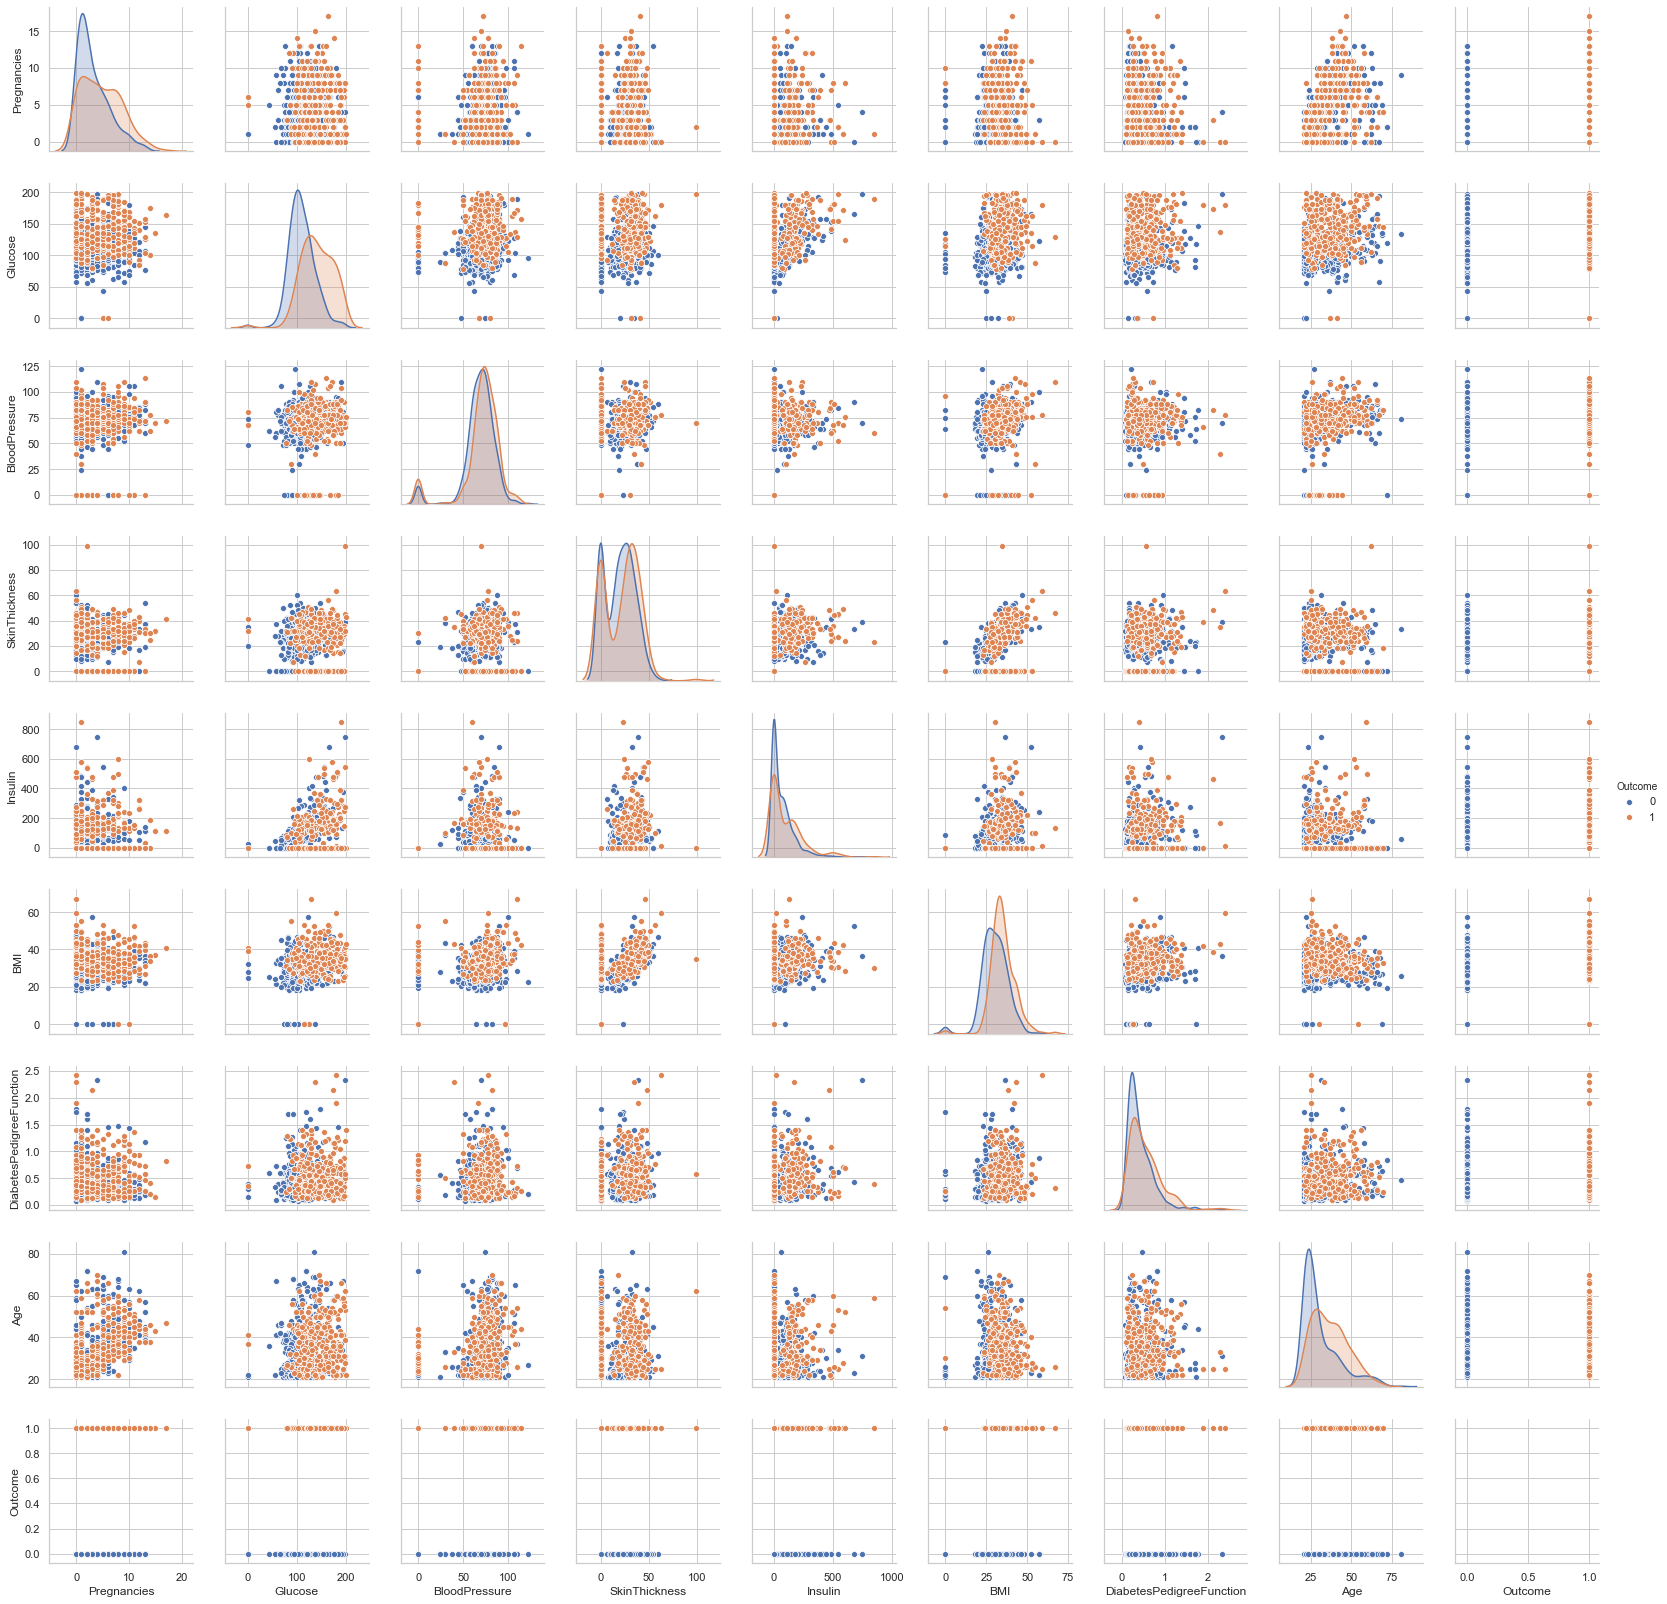

In [400]:
sns.pairplot(data, hue='Outcome')

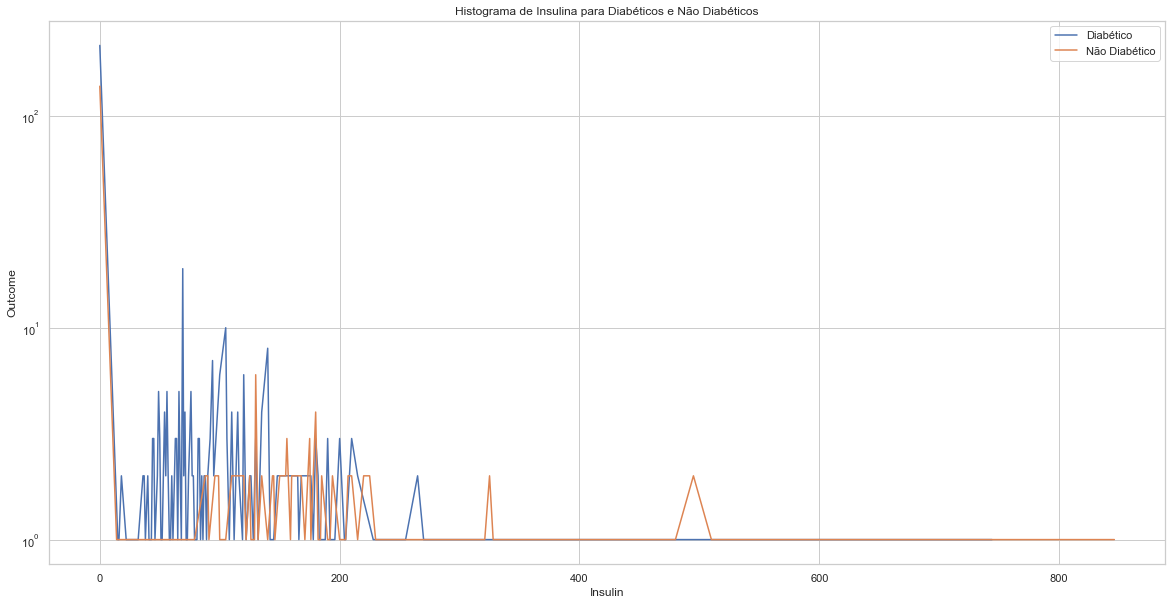

In [401]:
plt.figure(figsize=(20,10))
contagem0 = data0.groupby('Insulin').count()
contagem1 = data1.groupby('Insulin').count()
sns.lineplot(x=contagem0.index,y='Outcome',data=contagem0, label='Diabético')
sns.lineplot(x=contagem1.index,y='Outcome',data=contagem1, label='Não Diabético')
plt.title('Histograma de Insulina para Diabéticos e Não Diabéticos')
plt.yscale('log')


Text(0.5, 1.0, 'Probabilidade de Diabetes com o Aumento dos Níveis de Glicose')

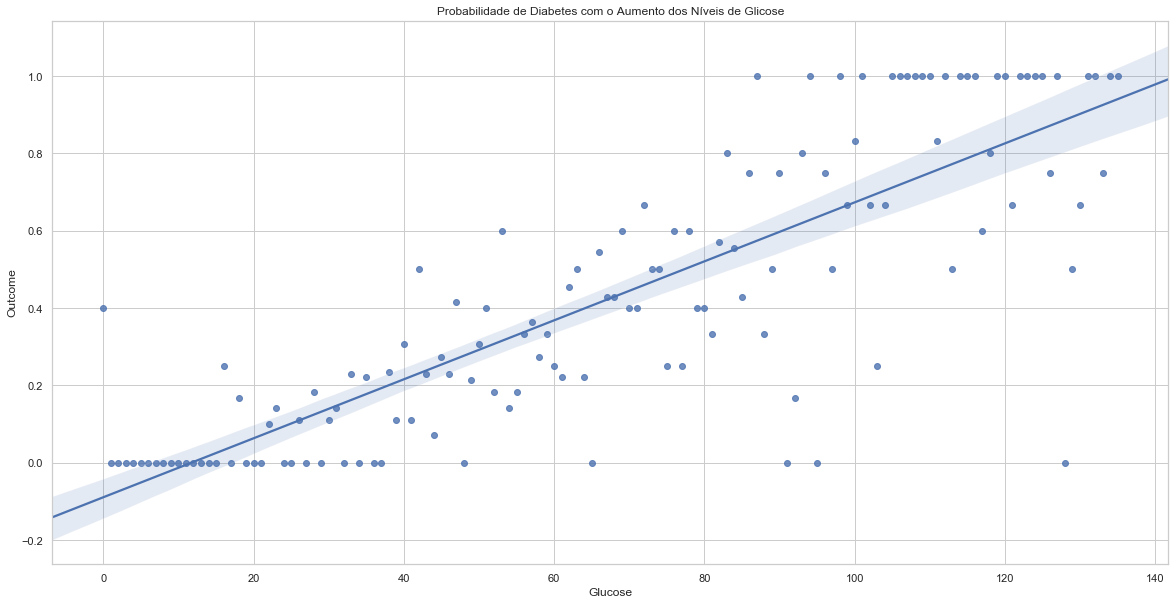

In [402]:
plt.figure(figsize=(20,10))
contag1 = data.groupby('Glucose').mean().reset_index()
contag1['Glucose']=contag1.index
sns.regplot(x='Glucose',y='Outcome',data=contag1)

plt.title('Probabilidade de Diabetes com o Aumento dos Níveis de Glicose')


### Limpeza dos Dados

Vamos verificar a presença de valores missing e substituí-los pela média do referido grupo que possua o mesmo Outcome.

In [403]:
Glucose_0 = data[(data['Glucose']== 0)]
print(Glucose_0)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  


In [404]:
data[(data['Glucose']==0) & (data['Outcome']==0)]=Glucose_0[Glucose_0['Outcome']== 0].replace(0, data[(data['Outcome']== 0)].mean())
data[(data['Glucose']==0) & (data['Outcome']== 1)]=Glucose_0[Glucose_0['Outcome']== 1].replace(0, data[(data['Outcome']== 1)].mean())

In [405]:
BloodPressure_0 = data[(data['BloodPressure']== 0)]
print(BloodPressure_0)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10    115.0              0              0      0.0  35.3   
15             7    100.0              0              0      0.0  30.0   
49             7    105.0              0              0      0.0   0.0   
60             2     84.0              0              0      0.0   0.0   
78             0    131.0              0              0      0.0  43.2   
81             2     74.0              0              0      0.0   0.0   
172            2     87.0              0             23      0.0  28.9   
193           11    135.0              0              0      0.0  52.3   
222            7    119.0              0              0      0.0  25.2   
261            3    141.0              0              0      0.0  30.0   
266            0    138.0              0              0      0.0  36.3   
269            2    146.0              0              0      0.0  27.5   
300            0    167.0             

In [406]:
data[(data['BloodPressure']==0) & (data['Outcome']==0)]=BloodPressure_0[BloodPressure_0['Outcome']== 0].replace(0, data[(data['Outcome']== 0)].mean())
data[(data['BloodPressure']==0) & (data['Outcome']== 1)]=BloodPressure_0[BloodPressure_0['Outcome']== 1].replace(0, data[(data['Outcome']== 1)].mean())

In [407]:
skin = data[(data['SkinThickness']== 0)]
print(skin)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            8.0    183.0           64.0            0.0      0.0  23.3   
5            5.0    116.0           74.0            0.0      0.0  25.6   
9            8.0    125.0           96.0            0.0      0.0   0.0   
10           4.0    110.0           92.0            0.0      0.0  37.6   
11          10.0    168.0           74.0            0.0      0.0  38.0   
12          10.0    139.0           80.0            0.0      0.0  27.1   
17           7.0    107.0           74.0            0.0      0.0  29.6   
21           8.0     99.0           84.0            0.0      0.0  35.4   
22           7.0    196.0           90.0            0.0      0.0  39.8   
26           7.0    147.0           76.0            0.0      0.0  39.4   
29           5.0    117.0           92.0            0.0      0.0  34.1   
33           6.0     92.0           92.0            0.0      0.0  19.9   
36          11.0    138.0           76

In [409]:
data[(data['SkinThickness']==0) & (data['Outcome']==0)]=skin[skin['Outcome']== 0].replace(0, data[(data['Outcome']== 0)].mean())
data[(data['SkinThickness']==0) & (data['Outcome']== 1)]=skin[skin['Outcome']== 1].replace(0, data[(data['Outcome']== 1)].mean())

In [411]:
insulina = data[(data['Insulin']== 0)]
print(insulina)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
23           9.0    119.0           80.0           35.0      0.0  29.0   
30           5.0    109.0           75.0           26.0      0.0  36.0   
34          10.0    122.0           78.0           31.0      0.0  27.6   
37           9.0    102.0           76.0           37.0      0.0  32.9   
38           2.0     90.0           68.0           42.0      0.0  38.2   
42           7.0    106.0           92.0           18.0      0.0  22.7   
45           0.0    180.0           66.0           39.0      0.0  42.0   
47           2.0     71.0           70.0           27.0      0.0  28.0   
48           7.0    103.0           66.0           32.0      0.0  39.1   
55           1.0     73.0           50.0           10.0      0.0  23.0   
65           5.0     99.0           74

In [412]:
data[(data['Insulin']==0) & (data['Outcome']==0)]=insulina[insulina['Outcome']== 0].replace(0, data[(data['Outcome']== 0)].mean())
data[(data['Insulin']==0) & (data['Outcome']== 1)]=insulina[insulina['Outcome']== 1].replace(0, data[(data['Outcome']== 1)].mean())

In [413]:
bmi = data[(data['BMI']== 0)]
print(bmi)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
371          0.0    118.0           64.0           23.0     89.0  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
371                     1.731   21        0  


In [414]:
data[(data['BMI']==0) & (data['Outcome']==0)]=bmi[bmi['Outcome']== 0].replace(0, data[(data['Outcome']== 0)].mean())
data[(data['BMI']==0) & (data['Outcome']== 1)]=bmi[bmi['Outcome']== 1].replace(0, data[(data['Outcome']== 1)].mean())

In [415]:
V

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.126263,121.691999,72.267826,26.864530,124.771038,32.441053,0.471876,33.240885,0.348958
std,3.202732,30.461151,12.115948,9.508640,91.935806,6.880054,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.404712,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,136.297569,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [419]:
st = data[(data['SkinThickness'] > 70)]
print(st)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
579          2.0    197.0           70.0           99.0  136.297569  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1  


In [422]:
data['SkinThickness'].iloc[579] = data['SkinThickness'].mean()

In [423]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.126263,121.691999,72.267826,26.770604,124.771038,32.441053,0.471876,33.240885,0.348958
std,3.202732,30.461151,12.115948,9.144460,91.935806,6.880054,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.404712,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,136.297569,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

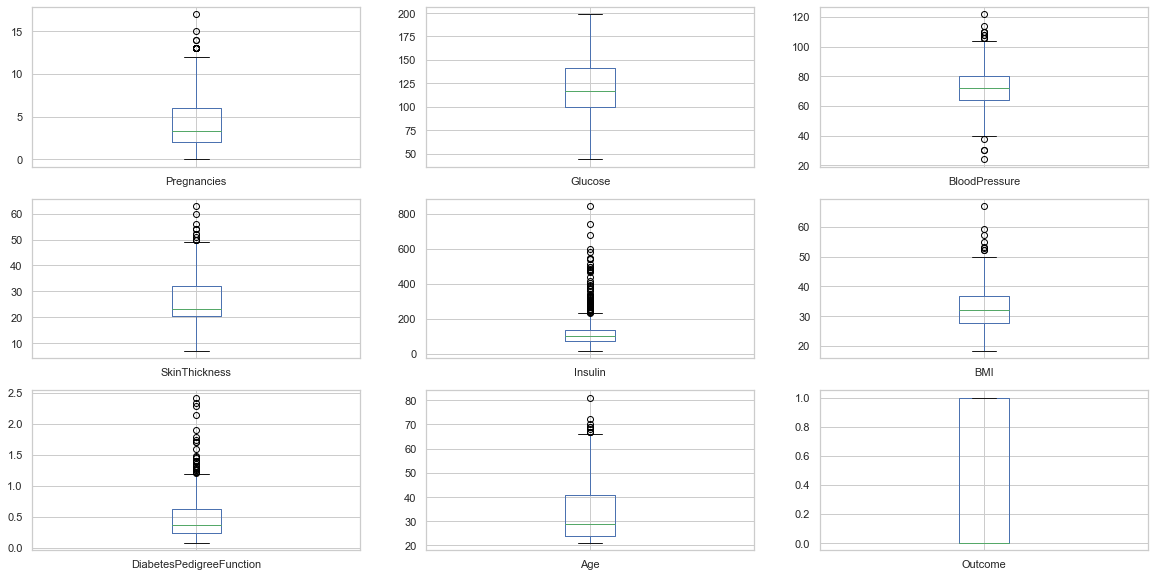

In [424]:
data.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(20,10))

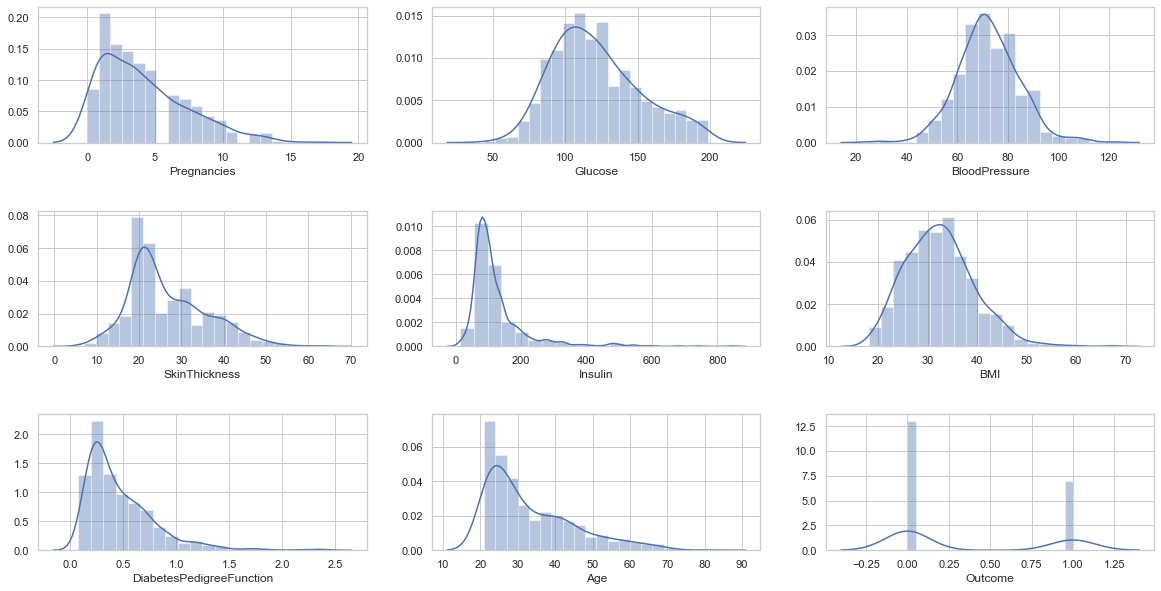

In [425]:
colnames = data.columns
fig, axis = plt.subplots(3, 3, figsize=(20, 10))
sns.distplot(data[colnames[0]], bins=20, ax=axis[0][0])
sns.distplot(data[colnames[1]], bins = 20, ax=axis[0][1])
sns.distplot(data[colnames[2]], bins = 20, ax=axis[0][2])
sns.distplot(data[colnames[3]], bins = 20, ax=axis[1][0])
sns.distplot(data[colnames[4]], bins = 20, ax=axis[1][1])
sns.distplot(data[colnames[5]], bins = 20, ax=axis[1][2])
sns.distplot(data[colnames[6]], bins = 20, ax=axis[2][0])
sns.distplot(data[colnames[7]], bins = 20, ax=axis[2][1])
sns.distplot(data[colnames[8]], bins = 20, ax=axis[2][2])
plt.subplots_adjust(wspace=0.2,hspace=0.5)

### Balanceamento dos Dados e Divisão Entre Teste e Treino

In [92]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [93]:
X = data.loc[:, data.columns != 'Outcome']
Y = data.loc[:, data.columns == 'Outcome']

In [94]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [95]:
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [23]:
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [26]:
os_data_X,os_data_Y = os.fit_sample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Outcome'])

print("Quantidade de dados: ",len(os_data_X))
print("Número de Não Diabéticos dos dados: ",len(os_data_Y[os_data_Y['Outcome']==0]))
print("Número de Não Diabéticos dos dados: ",len(os_data_Y[os_data_Y['Outcome']==1]))
print("Proporção de Não Diabéticos: ",len(os_data_Y[os_data_Y['Outcome']==0])/len(os_data_X))
print("Proporção de Diabéticos: ",len(os_data_Y[os_data_Y['Outcome']==1])/len(os_data_X))

Quantidade de dados:  686
Número de Não Diabéticos dos dados:  343
Número de Não Diabéticos dos dados:  343
Proporção de Não Diabéticos:  0.5
Proporção de Diabéticos:  0.5


### Eliminação de Variável Recursiva

In [68]:
data_final=data.columns.tolist()

In [69]:
data_final

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [70]:
Y=['Outcome']
X=[i for i in data_final if i not in Y]

In [71]:
X

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [72]:
Y

['Outcome']

In [73]:
logreg = LogisticRegression()

In [74]:
rfe = RFE(logreg, 6)
rfe = rfe.fit(os_data_X, os_data_Y.values.ravel())
print(rfe.support_)

[ True  True  True False False  True  True  True]


In [75]:
print(rfe.ranking_)

[1 1 1 2 3 1 1 1]


In [80]:
colu = ['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']

X=os_data_X[colu]
Y=os_data_Y['Outcome']

In [81]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.625595
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.097     
Dependent Variable:    Outcome            AIC:                870.3160  
Date:                  2019-10-13 11:44   BIC:                897.5013  
No. Observations:      686                Log-Likelihood:     -429.16   
Df Model:              5                  LL-Null:            -475.50   
Df Residuals:          680                LLR p-value:        1.8351e-18
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1093   0.0290  3.7704 0

Vamos selecionar as variáveis cujo P-Valor é menor do que 0.05.

In [82]:
colu=['Pregnancies','Glucose','BloodPressure'] 
X=os_data_X[colu]
y=os_data_Y['Outcome']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628634
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.093     
Dependent Variable: Outcome          AIC:              868.4857  
Date:               2019-10-13 11:44 BIC:              882.0784  
No. Observations:   686              Log-Likelihood:   -431.24   
Df Model:           2                LL-Null:          -475.50   
Df Residuals:       683              LLR p-value:      6.0231e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.0935   0.0244  3.8393 0.0001  0.0458  0.1412
Glucose            0.0163   0.0023  6.9905 0.0000  0.0117  0.0208


### Aplicar Regressão Logística

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
Y_pred = logreg.predict(X_test)
print('Acurácia da Regressão Logística no Teste {:.2f}'.format(logreg.score(X_test, Y_test)))

Acurácia da Regressão Logística no Teste 0.70


In [87]:
confusion_matrix = confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)

[[78 24]
 [37 67]]


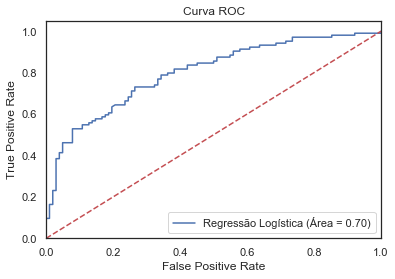

In [91]:
logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressão Logística (Área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


O modelo desenvolvido apresenta uma acurácia de 70%.